# Import biblioteka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

import datetime

# Učitavanje i analiza podataka

In [2]:
X_test= pd.read_csv('X_test.txt', sep='\s+')
y_test= pd.read_csv('y_test.txt', sep='\s+')
X_train= pd.read_csv('X_train.txt', sep='\s+')
y_train= pd.read_csv('y_train.txt', sep='\s+')

In [3]:
podaci_test = pd.concat([X_test, y_test], axis=1)
podaci_train = pd.concat([X_train, y_train], axis=1)

In [4]:
podaci = pd.concat([podaci_train, podaci_test], axis=0)

In [5]:
#Standardizacija testnog skupa

# Kolonu Class ne želim standardizovati
za_standardizaciju = podaci.drop(columns=['Class'])

# Inicijalizacija StandardScaler
scaler = StandardScaler()

# Primjena standardizacije
st_podaci = scaler.fit_transform(za_standardizaciju)

# Prevođenje podataka u dataframe
st_podaci = pd.DataFrame(st_podaci, columns=za_standardizaciju.columns)

# Dodavanje kolone Class nakon standardizacije
st_podaci = st_podaci.reset_index(drop=True)
podaci = podaci.reset_index(drop=True)
st_podaci['Class'] = podaci['Class']
st_podaci


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Class
0,0.210534,-0.068703,-0.452195,-0.883335,-0.945431,-0.744387,-0.874687,-0.944877,-0.773250,-0.868773,...,-0.000264,-0.299902,-0.357898,0.062039,-0.782988,-0.019034,-0.674432,0.382008,-0.016151,5
1,0.060208,0.035902,-0.275222,-0.890098,-0.929817,-0.860322,-0.883627,-0.927796,-0.858859,-0.884263,...,-0.925905,-0.789555,0.135993,-0.022538,-1.217721,1.470315,-0.681360,0.383148,-0.000121,5
2,0.078460,-0.046427,-0.085548,-0.883565,-0.913598,-0.906457,-0.878093,-0.904569,-0.908437,-0.876139,...,-0.287824,-0.461181,-0.375145,0.391762,0.134732,1.686961,-0.689471,0.384289,0.019214,5
3,0.071375,-0.227794,-0.270741,-0.885188,-0.946015,-0.935521,-0.879495,-0.943980,-0.938095,-0.876139,...,0.566244,0.436736,-0.132194,-0.034739,1.010013,-0.982261,-0.688915,0.388536,0.024624,5
4,0.033738,0.031617,-0.121380,-0.889855,-0.940846,-0.935041,-0.882451,-0.937622,-0.940948,-0.883152,...,-0.165153,-0.263958,0.343504,0.268015,1.096950,-1.251689,-0.687381,0.399066,0.038649,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.529503,-0.960174,0.185107,0.729285,0.738886,0.985976,0.671427,0.778479,0.959693,1.210539,...,-0.242630,-0.431080,-1.025409,0.768198,1.407463,-1.422736,-0.303659,0.691994,0.889111,2
10295,1.316644,-0.578309,0.056759,0.689343,1.076214,1.032342,0.629191,1.023717,0.864009,1.210539,...,-0.068167,-0.267420,-2.211711,-0.839484,-1.095665,0.684415,-0.310406,0.688561,0.880288,2
10296,1.118216,1.288059,-0.129415,0.634062,0.935694,0.899035,0.594164,0.810529,0.671554,0.880306,...,0.561361,0.487469,-0.562328,0.192082,1.101957,0.768150,-0.310750,0.691509,0.875719,2
10297,-0.543493,0.975327,0.234320,0.648934,0.560590,1.004592,0.583607,0.508257,0.815788,0.880306,...,0.290917,-0.000118,1.297936,-1.837152,1.479507,0.001693,-0.319284,0.659762,0.899444,2


# t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) je tehnika smanjenja dimenzionalnosti koja je posebno korisna za vizualizaciju podataka sa velikim brojem atributa. t-SNE koristi nenadgledane tehnike da "preslika" podatke u niže dimenzije, obično u 2D ili 3D prostor, što olakšava njihovu vizualizaciju.

t-SNE pokušava da sačuva lokalnu strukturu podataka (sličnost među tačkama u visoko-dimenzionalnom prostoru), tako da će slični podaci biti postavljeni bliže jedni drugima u nižem-dimenzionalnom prostoru.

Može da se koristi i za više od 3 komponente, ali nije tome namijenjen, te rezultati nisu pouzdani.

2D t-SNE

Početak 2D:  2025-04-20 19:29:57.965955


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


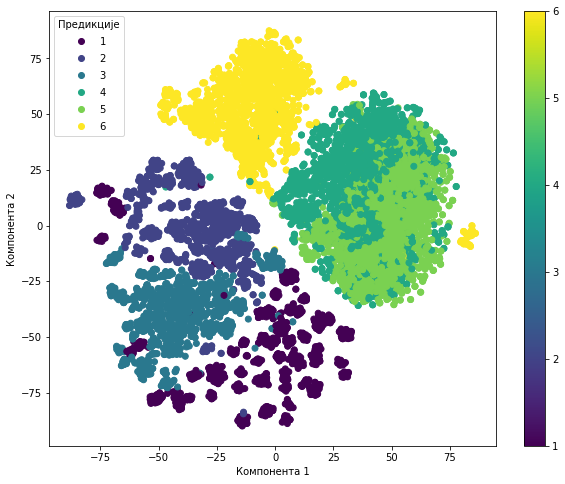

Kraj 2D:  2025-04-20 19:31:21.238056
Trajanje 2D u sekundama  83.272101


In [6]:
t1= datetime.datetime.now()
print('Početak 2D: ',t1)

# Primjena t-SNE za vizualizaciju podataka u 2D
tsne = TSNE(n_components=2, random_state=27)
X_tsne = tsne.fit_transform(st_podaci.drop(columns=['Class']))

# Vizualizacija: Boje predikcija na osnovu logističke regresije
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=st_podaci['Class'], cmap='viridis', marker='o')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend(*scatter.legend_elements(), title="Предикције")
plt.colorbar(scatter)
plt.show()
t2= datetime.datetime.now()
print('Kraj 2D: ',t2)
print('Trajanje 2D u sekundama ',(t2-t1).total_seconds())

3D t-SNE

Početak 3D:  2025-04-20 19:31:21.284883


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


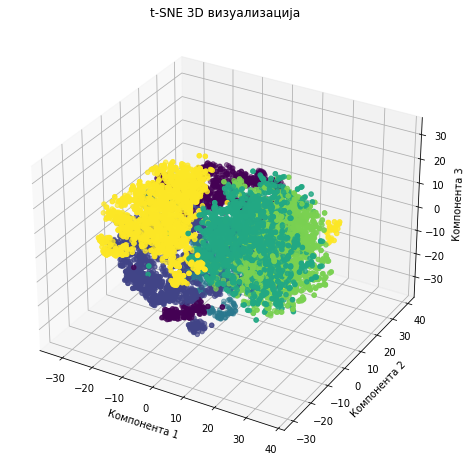

Kraj 3D:  2025-04-20 19:34:22.772800
Trajanje 3D u sekundama  181.487917


In [7]:
t3= datetime.datetime.now()
print('Početak 3D: ',t3)


# Kreiranje t-SNE model za 3D vizualizaciju
tsne_3d = TSNE(n_components=3, random_state=27)
X_tsne_3d = tsne_3d.fit_transform(st_podaci.drop(columns=['Class']))

# 3D vizualizacija
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=st_podaci['Class'],cmap='viridis', marker='o')
ax.set_title('t-SNE 3D визуализација')
ax.set_xlabel('Компонента 1')
ax.set_ylabel('Компонента 2')
ax.set_zlabel('Компонента 3')
plt.show()
t4= datetime.datetime.now()
print('Kraj 3D: ',t4)
print('Trajanje 3D u sekundama ',(t4-t3).total_seconds())